[View in Colaboratory](https://colab.research.google.com/github/ZER-0-NE/ML_problems/blob/master/keras_VGGFace_3FC.ipynb)

In [ ]:
from google.colab import auth
auth.authenticate_user()

!pip install PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

: 

In [ ]:
fileId = drive.CreateFile({'id': '1OhPBMbSOG3ejP26-peRmDPYX7WfF2ixN'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  # folder_data.zip
fileId.GetContentFile('dataset_cfps.zip')  # Save Drive file as a local file

!unzip dataset_cfps.zip -d ./

dataset_cfps.zip
Archive:  dataset_cfps.zip
   creating: ./dataset_cfps/
   creating: ./dataset_cfps/train/
   creating: ./dataset_cfps/train/22q11/
  inflating: ./dataset_cfps/train/22q11/22q11_0_1029.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1046.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1186.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1303.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1433.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1464.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1521.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1538.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1563.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1852.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1906.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_1987.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_2158.jpg  
  inflating: ./dataset_cfps/train/22q11/22q11_0_2174.jpg  
  inflating: ./dataset_cf

  inflating: ./dataset_cfps/train/CDL/CDL368.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL369.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL370.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL371.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL372.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL373.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL374.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL375.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL376.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL377.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL378.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL379.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL380.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL381.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL382.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL383.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL384.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL385.jpg  
  inflating: ./dataset_cfps/train/CDL/CDL386.jpg  
  inflating: ./dataset_cfps/tra

  inflating: ./dataset_cfps/train/Progeria/Progeria_0_575.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_5857.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_586.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_5862.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_590.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_5936.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_5978.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6071.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6076.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_612.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6129.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6182.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6190.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6208.jpg  
  inflating: ./dataset_cfps/train/Progeria/Progeria_0_6225.jpg  
  inflating: ./dataset_cfps/t

  inflating: ./dataset_cfps/train/Williams/Williams765.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams768.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams771.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams774.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams777.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams779.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams782.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams786.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams789.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams792.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams795.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams798.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams801.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams804.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams807.jpg  
  inflating: ./dataset_cfps/train/Williams/Williams810.jpg  
  inflating: ./dataset_c

: 

In [ ]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import callbacks
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras.models import load_model


: 

In [ ]:
!pip install keras_vggface

  Running setup.py bdist_wheel for keras-vggface ... - done
  Stored in directory: /content/.cache/pip/wheels/72/aa/01/eb7baeb2f6e2d2f0d2aabddb5f01d57fa22fbd019ee2799bf5
Successfully built keras-vggface


: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_4 (Model)              (None, 12)                24221388  
Total params: 24,221,388
Trainable params: 24,167,756
Non-trainable params: 53,632
_________________________________________________________________
Found 1774 images belonging to 12 classes.
Found 313 images belonging to 12 classes.
Epoch 1/50
56/55 [==============================] - 65s 1s/step - loss: 2.6470 - acc: 0.1024 - val_loss: 2.4310 - val_acc: 0.1821
Epoch 2/50
56/55 [==============================] - 48s 860ms/step - loss: 2.4824 - acc: 0.1539 - val_loss: 2.3145 - val_acc: 0.2556
Epoch 3/50
17/55 [========>.....................] - ETA: 30s - loss: 2.3773 - acc: 0.228256/55 [==============================] - 48s 860ms/step - loss: 2.3683 - acc: 0.2071 - val_loss: 2.2188 - val_acc: 0.3706
Epoch 4/50
56/55 [==============================] - 48s 861ms/step - loss: 2.2904 - acc: 0.243

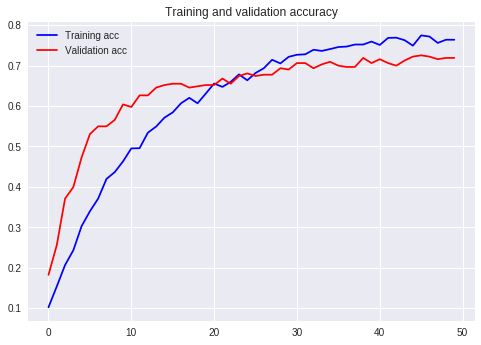

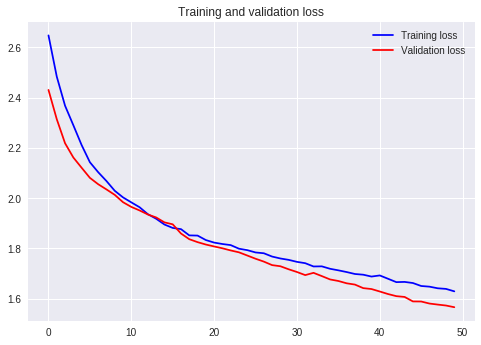

: 

In [ ]:
train_data_path = 'dataset_cfps/train'
validation_data_path = 'dataset_cfps/validation'

#Parametres
img_width, img_height = 224, 224

#Load the VGG model
#vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

vggface = VGGFace(model='resnet50', include_top=False, input_shape=(img_width, img_height, 3))

#vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))

last_layer = vggface.get_layer('avg_pool').output
x = Flatten(name='flatten')(last_layer)
xx = Dense(256, activation = 'relu')(x)
x1 = BatchNormalization()(xx)
x2 = Dropout(0.25)(xx)

y = Dense(256, activation = 'relu')(x2)
yy = BatchNormalization()(y)
y1 = Dropout(0.25)(y)

z = Dense(256, activation = 'relu')(y1)
zz = BatchNormalization()(z)
z1 = Dropout(0.25)(zz)

x3 = Dense(12, activation='sigmoid', name='classifier')(z1)

custom_vgg_model = Model(vggface.input, x3)


# Create the model
model = models.Sequential()
 
# Add the convolutional base model
model.add(custom_vgg_model)
 
# Add new layers
#model.add(layers.Flatten())
# model.add(layers.Dense(1024, activation='relu'))
# model.add(BatchNormalization())
#model.add(layers.Dropout(0.5))
# model.add(layers.Dense(12, activation='sigmoid'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()
#model = load_model('facenet_resnet_lr3_SGD_sameas1.h5')

def mcor(y_true, y_pred):
     #matthews_correlation
     y_pred_pos = K.round(K.clip(y_pred, 0, 1))
     y_pred_neg = 1 - y_pred_pos
 
 
     y_pos = K.round(K.clip(y_true, 0, 1))
     y_neg = 1 - y_pos
 
 
     tp = K.sum(y_pos * y_pred_pos)
     tn = K.sum(y_neg * y_pred_neg)
 
 
     fp = K.sum(y_neg * y_pred_pos)
     fn = K.sum(y_pos * y_pred_neg)
 
 
     numerator = (tp * tn - fp * fn)
     denominator = K.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
 
 
     return numerator / (denominator + K.epsilon())

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 

validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 32
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(img_width, img_height),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_path,
        target_size=(img_width, img_height),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=True)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-3),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('facenet_resnet_lr3_SGD_relu_first50_FC3.h5')

# loss and accuracy curves.
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()



In [ ]:
from google.colab import files
files.download('facenet_resnet_lr3_SGD_new_FC3_200.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 39654, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

: 

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " I Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 9.7 GB  I Proc size: 3.4 GB
GPU RAM Free: 503MB | Used: 10936MB | Util  96% | Total 11439MB


: 

: 